<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab1_From_linear_ODE_to_State_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

Name: Hany Hamed

Group: BS18-06



# From linear ODE to State Space

Given an ODE:

$$a_{k}y^{(k)} +a_{k-1}y^{(k-1)}+...+a_{2}\ddot y+a_{1}\dot y + a_0 y= b_0$$

find its state space representation:

$$\dot x = Ax + b$$

In [0]:
import numpy as np

n = 7                     # degree of the polynomial including the linear term with zero degree of differentiation (the degree of the ODE is 6)
a = np.random.rand(n)     # coefficients: [a0 a1 ... ak]
print("Our coeffitients a are:", a)
a = np.flip(a)            #to be pedantic with indicies in the notation

a_norm = a[1:] / a[0]     # divide by "ak"

A = np.zeros((n-1, n-1))  # state matrix
A[0:(n-2), 1:(n-1)] = np.eye(n-2)
A[n-2, 0:] = -a_norm

print("Our matrix A:")
print(A)

Our coeffitients a are: [0.27962986 0.45360903 0.03978001 0.65195677 0.49358586 0.28186801
 0.23246804]
Our matrix A:
[[ 0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [-1.2125022  -2.12324182 -2.80450066 -0.17112036 -1.95127481 -1.20287441]]


# Solve linear ODE and its state space representation

Assume $$ b = 0 $$

In [0]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x_dot from ODE
def LinearODE(x, t):
    dx = np.zeros(n-1)
    dx[0:n-2] = x[1:(n-1)]
    dx[n-2] = -a_norm.dot(x)
    return dx

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = {"ODE": odeint(LinearODE, x0, time), "SS": odeint(StateSpace, x0, time)}


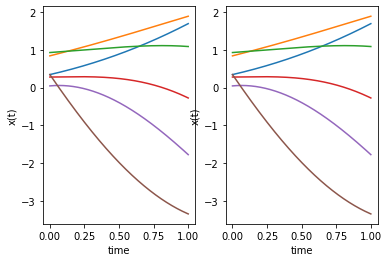

In [0]:
# ode based model
plt.subplot(121)
plt.plot(time, solution["ODE"])
plt.xlabel('time')
plt.ylabel('x(t)')

# state space based model
plt.subplot(122)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

In [0]:
e, v = np.linalg.eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-0.88851364+1.26533606j -0.88851364-1.26533606j  0.68966704+0.90910573j
  0.68966704-0.90910573j -0.40259061+0.47691627j -0.40259061-0.47691627j]


# Linear time variant systems

What if one of the coefficients of your ODE is changing with time? How do you model that? Consider example:

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
-10 & sin(t) \\
5 & -14 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

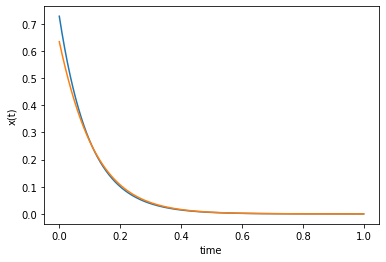

In [0]:
from math import sin

def LTV(x, t):
    A = np.array([[-10, sin(t)], [5, -14]])
    return A.dot(x)

x0 = np.random.rand(2)
solution["LTV"] = odeint(LTV, x0, time)

plt.plot(time, solution["LTV"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

# Questions for you:

* Is the ODE stable? Does its solution converges or diverges?
* How can you explain it?
* How would you analyse eigenvalues of an LTV system? What does that even mean?

# My Answers

The above solution converges to zero, it can be explained by getting the eignevalues of the matrix, if any one of them is positive it will diverge.  
  
The equation from getting the eigenvalues $det(A-\lambda) = 0$ is:

$\lambda^2 + 4\lambda + 140 + 5 sin(t) = 0$ as the sin(t) is bounded by [-1,1] while $t \to \infty$ then with any value of sin(t) the constant term will still positive which will result that $\lambda$ is negative and this means that any eigenvalues will be negative which will lead to converge and the system will be stable

The analysis of the eigenvalues, because the solution is always guessed in the form of the exponential and this form will not have the right substitution unless the power of the exponential is the eigenvalues.


# Your task:

1 part(85%)
* Do the same but take $b_0$ into account.
* Write state-space model for a spring-damper system
* Make simulation

<img src="https://www.mdpi.com/entropy/entropy-17-06289/article_deploy/html/images/entropy-17-06289-g001.png" width="400">

2 part(15%)
* System from Ogata B-3-4 (Same task)

# Recomended:

Ogata 2-4,5 3-2; Strogatz 5.0-2


# Solution Task: Part 1


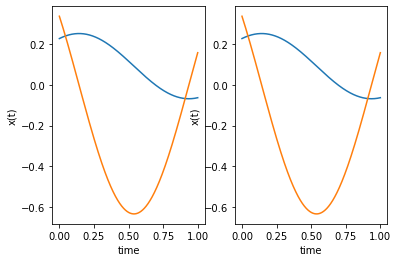

In [0]:
# First point
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x_dot from ODE
def LinearODE(x, t, b):
    b = int(b)/a[0]
    dx = np.zeros(n-1)
    dx[0:n-2] = x[1:(n-1)]
    dx[n-2] = -a_norm.dot(x) + b
    return dx


# x_dot from state space
def StateSpace(x, t, b):
    b = int(b)/a[0]
    b_matrix_coefficients = np.zeros(n-1)
    b_matrix_coefficients[n-2] = 1
    return A.dot(x) + b_matrix_coefficients.dot(b)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state
b = tuple(str(int(np.random.rand(1)[0]*10)))

solution = {"ODE": odeint(LinearODE, x0, time, args=(b)), "SS": odeint(StateSpace, x0, time, args=(b))}

# ode based model
plt.subplot(121)
plt.plot(time, solution["ODE"])
plt.xlabel('time')
plt.ylabel('x(t)')

# state space based model
plt.subplot(122)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

# Solution 2nd ponit in Part 1
$\ddot{y} + \frac{b}{m}\dot y + \frac{k}{m} y = \frac{1}{m}F(t)$


$x_1 = y \\ x_2 = \dot y$

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-\frac{b}{m} & -\frac{k}{m} 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}+
\begin{bmatrix}0 \\  \frac{1}{m}\end{bmatrix} F(t)$$




Mass: 0.2251115490155955, Spring Coefficient: 0.1005859893526192, Damper Coefficient: 0.45773990923855146
Our coeffitients a are: [0.1005859893526192, 0.45773990923855146]
Our matrix A:
[[ 0.          1.        ]
 [-0.44682732 -2.0333915 ]]


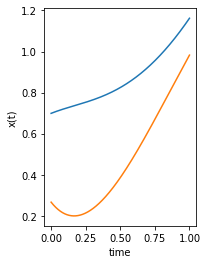

In [2]:
# 2nd point

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



n = 3                     # degree of the polynomial including the y^(0) term with zero degree of differentiation (the degree of the ODE is 2)
[mass, b_spring, k_damper] = np.random.rand(3)

print("Mass: {:}, Spring Coefficient: {:}, Damper Coefficient: {:}".format(mass, b_spring, k_damper))

a = [b_spring, k_damper]
print("Our coeffitients a are:", a)

a_norm = a[:] / mass     # divide by "ak"

A = np.zeros((n-1, n-1))  # state matrix
A[0:(n-2), 1] = 1
A[n-2, 0:] = -a_norm

print("Our matrix A:")
print(A)

# Make F dependsn on t
def functionF(t):
  return np.sin(t)

# x_dot from state space
def StateSpace(x, t):
    b = functionF(t)
    b_matrix_coefficients = np.zeros(n-1)
    b_matrix_coefficients[n-2] = 1/mass
    return A.dot(x) + b_matrix_coefficients.dot(b)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = odeint(StateSpace, x0, time)

# state space based model
plt.subplot(121)
plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()


# Solution Task: Part 2


* We will put coordinates frame fixed on the object and we will analysis the weight of the object ($mg$) to the axis of the frame to ($mgsin(\theta) = mg\theta, mgcos(\theta)= mg)$ respectively to the axis where the first one is for the x-axis of the frame and the second one for the y-axis of the frame. Notice that as the angle is too small, $sin(\theta)$ is approximated to $\theta$ and $cos(\theta)$ to 1.

* Calculate the torques around the pivot point
  $\tau = I \alpha = \sum F$, $I = ml^2$.
  We will analysis the restoring forces of the springs, they have the same magnitude and the same direction due to having one spring compressed and wants to be stretched and the other one is stretched and wants to be compressed in order to return to the rest position of the springs.
  
  Springs restoring forces = $2kd$
  We will analysis the restoring force to x-axis and y-axis of the object $(2kdcos\theta , 2kdsin\theta) = (2kd, 2kd\theta)$ where $d = asin\theta$

  $\sum F = -mgl\theta - 2ka^2\theta$

* Construct the Model:

  $ml^2 \ddot \theta = -mgl\theta - 2ka^2\theta$

  $\ddot \theta + \frac{g}{l}\theta + \frac{2ka^2}{ml^2}\theta = 0$
  
  $\ddot \theta + 0 * \dot \theta + (\frac{g}{l} + \frac{2ka^2}{ml^2})\theta = \frac{1}{ml^2}F_{ext}$



  $x_1 = \theta \\ x_2 = \dot \theta$

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-\frac{g}{l} - \frac{2ka^2}{ml^2} & 0
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}+
\begin{bmatrix}0 \\  \frac{1}{ml^2}\end{bmatrix} F(t)$$



![alt text](https://drive.google.com/uc?id=1IHmzVzhVBKkP_q2damcQomFqGlxCQprX)



Mass: 0.45055800998789375, Spring Coefficient: 0.9002258928371817, l_length (pendulem length): 0.9705684004138504, a_length (spring affecting length): 0.32762677699635
Our coeffitients a are: [4.75452131883536, 0]
Our matrix A:
[[  0.           1.        ]
 [-10.55251757  -0.        ]]


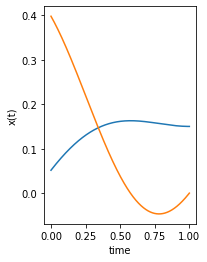

In [4]:
# 2nd point

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

n = 3                     # degree of the polynomial including the y^(0) term with zero degree of differentiation (the degree of the ODE is 2)
[mass, k_spring, l_length, a_length] = np.random.rand(4)

# Precondition of the selection of the a_length and modify it if it is not fullfill the condition
a_length = a_length if a_length <= l_length else l_length/int(np.random.rand(1)[0]*10)

g = 9.8
print("Mass: {:}, Spring Coefficient: {:}, l_length (pendulem length): {:}, a_length (spring affecting length): {:}".format(mass, k_spring, l_length, a_length))

a = [mass*g/l_length + 2*k_spring*(a_length**2)/(l_length**2), 0]
print("Our coeffitients a are:", a)

a_norm = a[:] / mass     # divide by "ak"

A = np.zeros((n-1, n-1))  # state matrix
A[0:(n-2), 1] = 1
A[n-2, 0:] = -a_norm

print("Our matrix A:")
print(A)

def functionF(t):
  return np.sin(t)

# x_dot from state space
def StateSpace(x, t):
    b = functionF(t)
    b_matrix_coefficients = np.array([0, 1/(mass*(l_length**2))])
    return A.dot(x) + b_matrix_coefficients.dot(b)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = odeint(StateSpace, x0, time)

# state space based model
plt.subplot(121)
plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()